# First dusk/dawn exercises

Welcome to your first dusk/dawn exercises. The goal is to code some simple dusk code. For now, we will only do point-wise stencils. You will see neighborhoods & extents in other exercises. At the end, we will also implement some basic image processing techniques.

### Simple `c = a + b` stencil

We will start off with a simple stencil that adds two fields together. The goal is to compute `c = a + b`.

Here is a skeleton for our stencil. It takes three fields as input. Below is a skeleton that you have to fill out:

In [1]:
from dusk.script import *

@stencil
def simple_stencil(
    a: Field[Cell],
    b: Field[Cell],
    c: Field[Cell]
):
    with levels_upward:
        # Here we write what we want to compute:
        c = a + b

Now that we've written the stencil, we want to compile it to C++. We can to this with dusk's python API and dawn's cli:

In [2]:
from dusk.transpile import callable_to_pyast, pyast_to_sir, sir_to_json

with open("simple_stencil.sir", "w") as f:
    f.write(sir_to_json(pyast_to_sir(callable_to_pyast(simple_stencil))))

!dawn-opt simple_stencil.sir | dawn-codegen -b naive-ico -o simple_stencil_cxx-naive.cpp
!clang-format -i simple_stencil_cxx-naive.cpp

Then we continue with compiling the C++ code into an exectuable:

In [3]:
!make simple_stencil

Lastly, we run the `runner`. It will write out your results to disk.

In [4]:
!./runner

Finished simple stencil successfully.


To check whether the stencil does what it should, there is a small checker function. It will veriy whether `c == a + b`.
Let's see if everything worked out well:

In [5]:
from helpers import check_first
check_first()

Success (`c == a + b`)!


You should now see:

    Success (`c == a + b`)!

If not, your stencil might be wrong or something else went wrong before.

### Displaying the absolute-value norm on a triangular mesh

In this exercise, we want to plot the absolute-value norm on a triangular mesh. The absolute-value norm for a two dimensional vector $ \textbf{x} $ is defined as:

$$ | \textbf{x} | = | x_1 | + | x_2 | $$

Where $ x_1 $ and $ x_2 $ are the two scalar components of $ \textbf{x} $.

Our grid will be of size 54x54, so we want to center the norm around $ (27, 27) $. To get some nice contour lines, we will use the floor function. Additionally, we will scale the result by 10 before applying the floor function.

All together this gives us:

$$ c = \left \lfloor \frac{| \textbf{x} - \textbf{v} |}{10} \right \rfloor, \textbf{v} = \begin{pmatrix} 27 \\ 27 \end{pmatrix} $$

Hint: In dusk you can use `abs(a)` for $ | a | $ and `floor(b)` for $ \lfloor b \rfloor $.

Hint: Dusk doesn't support vectors. It's probably best to write $ \textbf{v} $'s components separately as constants.

Below is a skeleton that you can fill out to prepare the contour plot:

In [6]:
from dusk.script import *

@stencil
def simple_stencil(
    x: Field[Cell],
    y: Field[Cell],
    c: Field[Cell]
):
    with levels_upward:
        # We want to store the floored and scaled absolute norm into `c`:
        c = abs(x - 27) + abs(y - 27)
        c = floor(c/10)

Once we've written the stencil, we want to see if it computes what we wanted. This time all of the steps are condensed right below.

In [7]:
from dusk.transpile import callable_to_pyast, pyast_to_sir, sir_to_json

with open("simple_stencil.sir", "w") as f: f.write(sir_to_json(pyast_to_sir(callable_to_pyast(simple_stencil))))

!dawn-opt simple_stencil.sir | dawn-codegen -b naive-ico -o simple_stencil_cxx-naive.cpp
!clang-format -i simple_stencil_cxx-naive.cpp
!make simple_stencil
!./runner

Finished simple stencil successfully.


To plot the contour lines, we prepared a helper function:

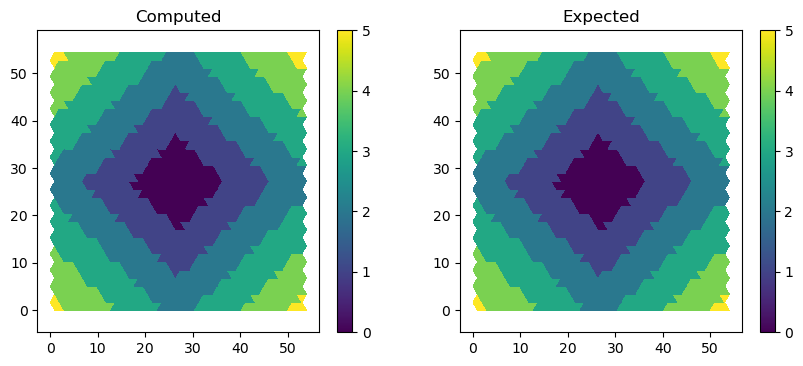

In [8]:
from helpers import plot_c
plot_c()

See if your plot matches the expected result.

Bonus: If you want to, you can also plot other norms and see what they look like on a triangular mesh. But maybe do this after you've finished the other exercises, there's some interesting things coming still :).

### Colored to black/white image:

A classic and simple image transformation is to convert a colored image to a black and white image. Let's see what that would look like in dusk.

For this exercise we will use the ESiWACE logo:

![esiwace logo](./logo.jpg)

You can also upload your own image into the jupyter lab session. However, be careful because bigger images can take a long time to process, since the naive C++ backend is not optimized at all.
We will use a smaller version of the ESiWACE logo (`./logo_small.jpg`):

In [9]:
from helpers import image_to_data
# stores the jpg into `./picture.txt` which the runner will read later on
image_to_data('./logo_small.jpg')

To convert an RGB image to black and white, we will average all three color channels:

$$ c = \frac{r + g + b}{3} $$

Then all three color channels will take on this value:

$$ r = c $$
$$ g = c $$
$$ b = c $$

(Some methods will weight the three color channels differently, but let's keep it simple for now)

For this stencil, you'll have multiple inputs:

* The three color channels: `r`, `g`, `b`

* Some fields to store intermediate results: `tmp1`, `tmp2`, `tmp3`, `tmp4`, `tmp5`, `tmp6`

* The cell mid-points: `x`, `y` (you can also use them as intermediate results)

(There are some scaling issues when it comes to `x` and `y`, but you won't need those for the exercises. However, they might be interesting if you want to experiment with such an image stencil)

Feel free to rename those parameters as you please!

Use the skeleton below to compute the black and white values for each cell based on its three color values:

In [10]:
from dusk.script import *

@stencil
def image_stencil(
    r: Field[Cell],
    g: Field[Cell],
    b: Field[Cell],
    tmp1: Field[Cell],
    tmp2: Field[Cell],
    tmp3: Field[Cell],
    tmp4: Field[Cell],
    tmp5: Field[Cell],
    tmp6: Field[Cell],
    x: Field[Cell],
    y: Field[Cell],
):
    with levels_upward:
        r = (r + g + b)/3
        g = r
        b = r

Then we compile & run the whole stencil:

In [11]:
from dusk.transpile import callable_to_pyast, pyast_to_sir, sir_to_json
with open("image_stencil.sir", "w") as f:
    f.write(sir_to_json(pyast_to_sir(callable_to_pyast(image_stencil))))

!dawn-opt image_stencil.sir | dawn-codegen -b naive-ico -o image_stencil_cxx-naive.cpp
!clang-format -i image_stencil_cxx-naive.cpp
!make image_stencil

!./runner

Finished image stencil successfully.


To plot your results you can use this prepared helper function:

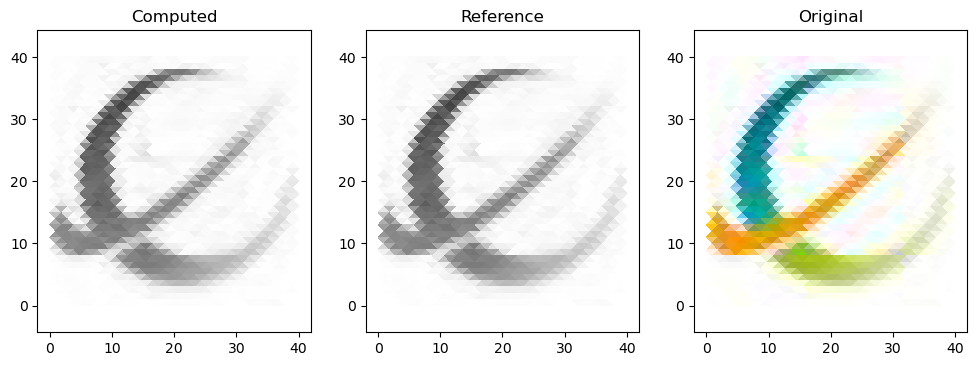

In [12]:
from helpers import plot_image
plot_image('black_white')

Verify whether your computed solution corresponds to the reference solution.

### Over saturated image:

Next we will try to increase the saturation of an image. This is useful to impress your friends with oversaturated landscape pictures from your holidays.

To do this, we want to dampen weak colors and strenghten strong colors. We will again work on a _per colorchannel basis_.

We will map each color channel based on a curve. For saturation we can use a curve like:

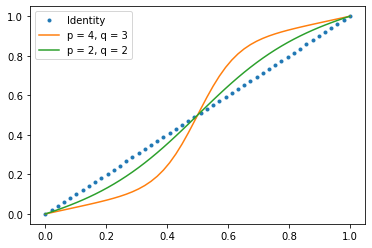

In [13]:
from helpers import plot_saturation_curve
plot_saturation_curve()

These curves are given by:

Weights:

$$
w_1 = (1 - x)^p
$$

$$
w_2 = x^p
$$

Fractions:

$$
f_1 = \frac{x}{q}
$$

$$
f_2 = \frac{x - 1}{q} + 1
$$

Formula:

$$
y = \frac{w_1 f_1 + w_2 f_2}{w_1 + w_2}
$$

However, these curves work for $ x \in [0, 1] $. Our RGB channels are in $ [0, 255] $.

Which leaves us with the following steps per channel:

* Scale channel from $ [0, 255] $ linearly to $ [0, 1] $

* Apply curve

* Scale channel back from $ [0, 1] $ to $ [0, 255] $ linearly

Hint: The power operator can be written in dusk as `x**y`. Take care that all operands are floats (and not integers), otherwise you might trigger spurious type errors. Alternatively, you can also write it as `pow(x, y)`.

Note: Since we have to apply the same operation for all three color channels, you will probably end up with quite a few code clones. In the future, we will support functions inside stencils, so that we can avoid such code clones.

We have provided you with the following skeleton:

In [14]:
from dusk.script import *

@stencil
def image_stencil(
    r: Field[Cell],
    g: Field[Cell],
    b: Field[Cell],
    p: Field[Cell],
    q: Field[Cell],
    w1: Field[Cell],
    w2: Field[Cell],
    f1: Field[Cell],
    f2: Field[Cell],
    x: Field[Cell],
    y: Field[Cell],
):
    with levels_upward:
        
        # we can change these to try different curves
        p = 4.0
        q = 3.0
        
        # apply the above steps per channel:
        
        # scale down
        r /= 255
        g /= 255
        b /= 255
        
        # apply curve to r
        w1 = (1 - r)**p
        w2 = r**p
        
        f1 = r/q
        f2 = (r - 1)/q + 1
        
        r = (w1*f1 + w2*f2)/(w1 + w2)
        
        
        # apply curve to g
        w1 = (1 - g)**p
        w2 = g**p
        
        f1 = g/q
        f2 = (g - 1)/q + 1
        
        g = (w1*f1 + w2*f2)/(w1 + w2)
        
        # apply curve to b
        w1 = (1 - b)**p
        w2 = b**p
        
        f1 = b/q
        f2 = (b - 1)/q + 1
        
        b = (w1*f1 + w2*f2)/(w1 + w2)

        # scale up
        r *= 255
        g *= 255
        b *= 255
        

Then we compile and run the stencil.

In [15]:
from dusk.transpile import callable_to_pyast, pyast_to_sir, sir_to_json

with open("image_stencil.sir", "w") as f:
    f.write(sir_to_json(pyast_to_sir(callable_to_pyast(image_stencil))))

!dawn-opt image_stencil.sir | dawn-codegen -b naive-ico -o image_stencil_cxx-naive.cpp
!clang-format -i image_stencil_cxx-naive.cpp
!make image_stencil
!./runner

Finished image stencil successfully.


And last we look at our results

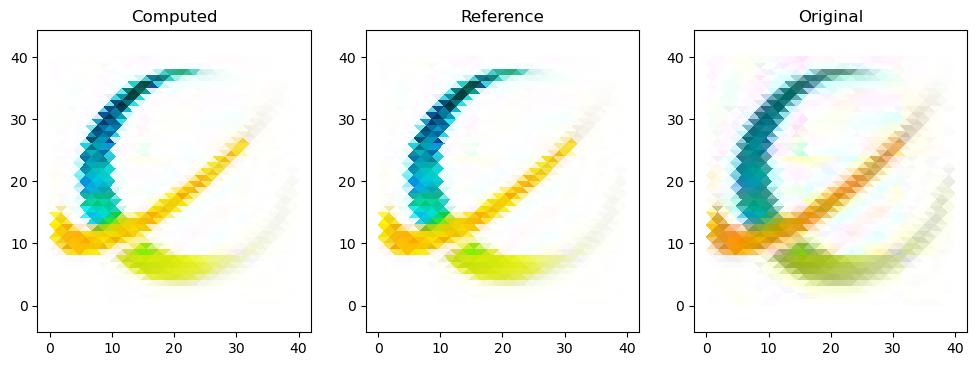

In [16]:
from helpers import plot_image
plot_image('saturation')

Hopefully, you will have computed a nicely oversaturaed ESiWACE logo.

If you want to experiment with other stencils, you can also plot only the computed image:

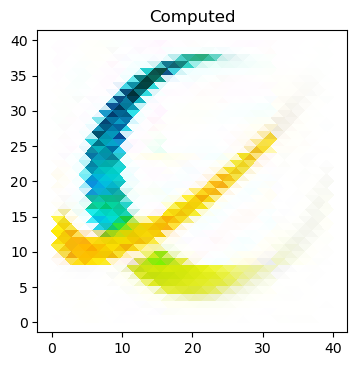

In [17]:
from helpers import plot_single_image
plot_single_image()

That's it for our first exercises. If you made it this far, congratulations!
Please let us know in slack also :)